# ANALISIS DE  VIAJES PARA ZUBER

El siguiente análisis se lleva a cabo para la empresa de viajes compartidos Zuber.

Se va a realizar un estudio sobre los datos de los viajes realizados por varias compañías competidoras en la ciudad de Chicago. Para ello se estableceran los siguientes objetivos:

- Encontrar patrones en los datos analizados.
- Verificar las preferencias de los clientes dentro de la competencia.
- Establecer quienes son los competidores mas relevantes y su participación en el mercado.
- Establecer las zonas con mayor cantidad de viajes completados en promedio.
- Establecer si otras variables afectan el desarrollo del servicio, especificamente, el clima.


##  IMPORTACION LIBRERÍAS

In [3]:
import pandas as pd
import numpy as np
from scipy import stats as st 

## IMPORTACIÓN DE DATOS

In [4]:
trips_amount = pd.read_csv('project_sql_result_01.csv')
trips_average = pd.read_csv('project_sql_result_04.csv')
trips_loop = pd.read_csv('project_sql_result_07.csv')

## LIMPIEZA DE DATOS

### Tabla Cantidad de Viajes por Empresa

In [5]:
#resumen de la tabla
trips_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
trips_amount.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [7]:
#comprobación duplicados
trips_amount [trips_amount.duplicated()]

,company_name,trips_amount


In [8]:
#resumen estadísitico de la cantidad de viajes
trips_amount['trips_amount'].describe()

count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64

- Según la exploración previa, la tabla no tiene datos nulos ni repetidos. Los tipos de datos están correctos de acuerdo a cada columna.
- Observando el resumen estadístico del número de viajes, podemos observar que el máximo está muy lejos de la media y su descviación, además de encontrarse fuera del percentil 75 de los datos. Por tanto se puede considerar que es un caso fuera de lo normal, y se le debería prestar especial atención ya que es el líder del mercado.

### Tabla Promedio de viajes por dirección de llegada

In [9]:
#resumen de la tabla
trips_average.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [10]:
trips_average.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [11]:
#comprobación duplicados
trips_average [trips_average.duplicated()]

,dropoff_location_name,average_trips


In [12]:
#resumen estadísitico de los promedios de viajes completados por barrio
trips_average['average_trips'].describe()

count       94.000000
mean       599.953728
std       1714.591098
min          1.800000
25%         14.266667
50%         52.016667
75%        298.858333
max      10727.466667
Name: average_trips, dtype: float64

- Según la exploración previa, la tabla no tiene datos nulos ni repetidos. Los tipos de datos están correctos de acuerdo a cada columna.
- En cuanto al resumen estadístico de la columna average_trips, se puede observar que el máximo está muy por encima de la media y su desviación, además de encontrarse fuera del percentil 75 de los datos, haciendo que sea de particular relevancia este barrio por que se podría llegar a considerar un outlier (con muy alto promedio viajes completados). 

In [13]:
#resumen de la tabla
trips_loop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [14]:
#comprobación duplicados
trips_loop.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [15]:
#comprobación duplicados
trips_loop [trips_loop.duplicated()]

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0
1058,2017-11-25 12:00:00,Good,1440.0
1062,2017-11-11 06:00:00,Good,1500.0
1065,2017-11-11 13:00:00,Good,2100.0


In [16]:
#resumen estadísitico de la duración en segundos de los viajes
trips_loop['duration_seconds'].describe()

count    1068.000000
mean     2071.731273
std       769.461125
min         0.000000
25%      1438.250000
50%      1980.000000
75%      2580.000000
max      7440.000000
Name: duration_seconds, dtype: float64

In [17]:
#Comprobando cantidad de viajes con duración de 0
no_duration = trips_loop[trips_loop['duration_seconds']== 0]
no_duration

,start_ts,weather_conditions,duration_seconds
163,2017-11-11 09:00:00,Good,0.0
168,2017-11-11 07:00:00,Good,0.0
204,2017-11-18 19:00:00,Good,0.0
552,2017-11-04 01:00:00,Good,0.0
801,2017-11-04 09:00:00,Good,0.0
1063,2017-11-25 11:00:00,Good,0.0


In [18]:
trips_loop.drop(index=no_duration.index,inplace=True)

In [19]:
trips_loop[trips_loop['duration_seconds']== 0]

,start_ts,weather_conditions,duration_seconds


- Según la exploración previa, la tabla no tiene datos nulos. Los tipos de datos están correctos de acuerdo a cada columna.
- Existen varios datos duplicados, esto se puede deber a que el tiempo fue redondeado a horas y por tanto, entre dos viajes llega a coincidir el inicio, las condiciones de clima y su duración.
- En cuanto al resumen estadístico de la columna duration_seconds, se puede ver que existen viajes con duración 0, lo cual puede ser un error en alguna parte de la toma de datos. Al ser solo 6, no afectan de manera importante al conjunto de datos, por lo que se eliminan.
- También se puede ver que la duración máxima está muy lejos del promedio y la desviación, también por encima del percentil 75. Por ende puede llegar a ser considerado un outlier. 

## EXPLORACIÓN DE DATOS

### Tabla de viajes por empresa

In [20]:
#Filtrado 10 empresas con mas viajes
top_companies = trips_amount.sort_values (by='trips_amount',ascending=False).head(10)
top_companies

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


<AxesSubplot: title={'center': 'Top 10 Companies By Trips'}, xlabel='Company Name', ylabel='Trips Amount'>

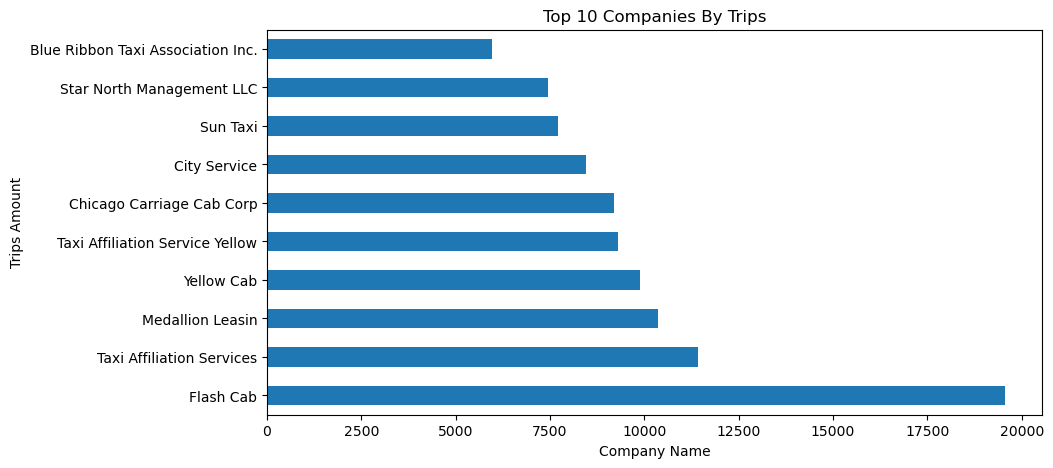

In [29]:
# Gráfico top 10 empresas con mas viajes
top_companies.plot (kind='barh',x='company_name',y='trips_amount', 
                    figsize=(10,5), xlabel='Company Name',ylabel='Trips Amount',
                   title='Top 10 Companies By Trips', legend=False)

- De acuerdo a los datos, se aprecia claramente que la empresa mas popular por número de viajes es Flash Cab, misma que prácticamente dobla en cantidad a la segunda.
- El resto de empresas están parejas ya que tienen cantidades comparables en el rango de 11 mil a 5 mil. 

### Tabla Promedio de viajes por dirección de llegada

In [22]:
#Filtrado 10 promedios mas altos
top_neighborhoods = trips_average.sort_values (by='average_trips',ascending=False).head(10)
top_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


<AxesSubplot: title={'center': 'Top 10 Neighborhoods By Average Trips'}, xlabel='Neighborhood Name', ylabel='Average Trips'>

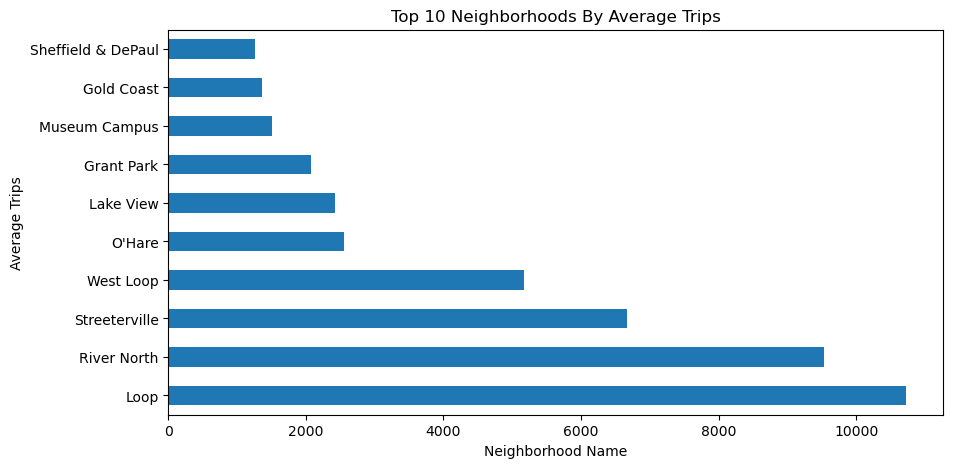

In [30]:
# Gráfica del top 10 barrios con mayor promedio de viajes concluidos 
top_neighborhoods.plot (kind='barh',x='dropoff_location_name',y='average_trips', 
                    figsize=(10,5), xlabel='Neighborhood Name',ylabel='Average Trips',
                   title='Top 10 Neighborhoods By Average Trips', legend=False)

- De acuerdo a la gráfica, destacan los barrios de 'Loop' y ' River North', que son los que en promedio tienen mayor cantidad de viajes finalizados. Podrían considerarse los prioritarios.
- Con una diferencia significativa tenemos un segundo grupo conformado por 'Streeterville' y 'West Loop'
- El tercer grupo conformado por el resto del top 10, tiene un promedio comparable entre si, y a menos de la mitad del grupo superior.

## ANÁLISIS ESTADÍSTICO

Comprobar lo siguiente: "La duración promedio de los viajes desde loop hasta el aeropuerto O'Hare cambia los sábados lluviosos"

In [24]:
trips_loop.head(20)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


### Preparación de datos

In [25]:
# Elaboración de tabla pivot el con promedio de duración de viajes por condición del clima, 
#incluye desviación y número de muestras
conditions = trips_loop.pivot_table(index='weather_conditions',
                                   values='duration_seconds',
                                    aggfunc=['mean','std','count'])

conditions.columns=['mean','std_deviation','n']

#Agrego la columna con el promedio de la desviación 
conditions['average_dev']= conditions['std_deviation']/np.sqrt(conditions['n'])
conditions

,mean,std_deviation,n,average_dev
weather_conditions,,,,
Bad,2427.205556,721.314138,180,53.763582
Good,2013.278912,743.565217,882,25.037143


### Prueba de Hipótesis

Hipotesis Nula y Alternativa:
- H0: La duración promedio de los viajes desde loop hasta el aeropuerto O'Hare es igual los sábados lluviosos y los sábados con buen clima.
- Ha: La duración promedio de los viajes desde loop hasta el aeropuerto O'Hare cambia los sábados lluviosos.

#### Prueba de Levene

 Uso de Levene para comparar si las varianzas de las muestras son iguales

In [26]:
lev_test = st.levene(trips_loop[trips_loop['weather_conditions'] == 'Bad']['duration_seconds'], 
                     trips_loop[trips_loop['weather_conditions'] == 'Good']['duration_seconds'])

print ('Probabilidad de que las varianzas sean iguales: ',lev_test.pvalue*100,'%')

beta= 0.05

if lev_test.pvalue< beta:
    print ('las varianzas no son iguales, equalvar= False')
else:
    print ('las varianzas son iguales, equalvar= True')

Probabilidad de que las varianzas sean iguales:  66.87312920630069 %
las varianzas son iguales, equalvar= True


#### Prueba T Student

In [27]:
# Uso del Ttest para comparar estadísticamente los datos de tiempo en función del clima
prob = st.ttest_ind (trips_loop[trips_loop['weather_conditions'] == 'Bad']['duration_seconds'], 
                     trips_loop[trips_loop['weather_conditions'] == 'Good']['duration_seconds'],
                equal_var = True, alternative = 'two-sided')

print ('La probabilidad de que la hipotesis nula sea verdadera es de: ', (prob.pvalue)*100, '%')

La probabilidad de que la hipotesis nula sea verdadera es de:  1.3318772977743245e-09 %


In [28]:
#Establecer el umbral alfa de significancia
alpha = 0.5

#Comprobar el resultado del Ttest con el umbral de decisión alfa
if (prob.pvalue > alpha):
    print ('No se puede negar la hipotesis nula')
else:
     print('La hipótesis alternativa es estadísticamente relevante')

La hipótesis alternativa es estadísticamente relevante


## Conclusiones

- Podemos considerar relevantes para el análisis a las empresas 'Flash Cab' (con especial énfasis) y 'Taxi Affillation Services', ya que son las que mas viajes realizan.
- En cuanto al comportamiento de cada viaje, se puede prestar atención a los barrios 'Loop' y ' River North', como los que tienen mayor promedio de arribos.
- En cuanto al tiempo de los viajes respecto al clima, podemos tomar de ejemplo el caso de los viajes entre Loop y el aeropuerto O'Hare, para afirmar que es estadísticamente relevante la diferencia existente en el promedio de duración de los viajes para los sábados lluviosos versus los que tienen buen clima.